<a href="https://colab.research.google.com/github/ayobamiakomolafe/Data-Analysis-of-KDD-Dataset/blob/main/Data_Analysis_KDD_Dataset_99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path='/content/drive/MyDrive/kddcup.data_10_percent (1).gz' #Directory to the .gz dataset

In [ ]:
#reading the file into a pandas dataframe
import pandas as pd
data = pd.read_csv(path,  compression='gzip', error_bad_lines=False)


In [ ]:
data.shape

(494020, 42)

In [ ]:
data.head()

,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,0.5,1,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,8,8.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,9,9.1,1.00.1,0.00.6,0.11.1,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
0,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


# **DATA** **CLEANING** **PROCESS**

Re-naming the Columns

In [ ]:
old_columns=data.columns # Gets a list of all the old columns
new_columns=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',
'root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',
'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','class']

In [ ]:
#create dictionary to map old columns to new columns and replace old columns with new columns
columns=dict()
for a, b in zip(old_columns,new_columns):
  columns[a]=b
data=data.rename(columns=columns)

In [ ]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


Checking for Missing values

In [ ]:
data.info() #All the columns contain 494020, hence no missing value in the dataset
print("Number of Missing values:", len(data[data.isnull().any(1)]) ) # This also shows there is no missing value in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  num_compromised              494020 non-null  int64  
 13 

drop duplicate values

In [ ]:
data.drop_duplicates(keep='first', inplace = True)
data.shape
# After dropping duplicate values the data was reduced from 494020 to 145585 rows, this shows high level of redundancy

(145585, 42)

Checking for badly formatted data

In [ ]:
#check the columns with object data_types to ensure the data wasn't badly formatted
for i in ['protocol_type','service','flag', 'class']:
  x=data[i].unique() # checking for the unique words in each object data_type columns to ensure no bad formats
  print(x)
# inspection of the unique words show that the data is well formatted

['tcp' 'udp' 'icmp']
['http' 'smtp' 'finger' 'domain_u' 'auth' 'telnet' 'ftp' 'eco_i' 'ntp_u'
 'ecr_i' 'other' 'private' 'pop_3' 'ftp_data' 'rje' 'time' 'mtp' 'link'
 'remote_job' 'gopher' 'ssh' 'name' 'whois' 'domain' 'login' 'imap4'
 'daytime' 'ctf' 'nntp' 'shell' 'IRC' 'nnsp' 'http_443' 'exec' 'printer'
 'efs' 'courier' 'uucp' 'klogin' 'kshell' 'echo' 'discard' 'systat'
 'supdup' 'iso_tsap' 'hostnames' 'csnet_ns' 'pop_2' 'sunrpc' 'uucp_path'
 'netbios_ns' 'netbios_ssn' 'netbios_dgm' 'sql_net' 'vmnet' 'bgp' 'Z39_50'
 'ldap' 'netstat' 'urh_i' 'X11' 'urp_i' 'pm_dump' 'tftp_u' 'tim_i' 'red_i']
['SF' 'S1' 'REJ' 'S2' 'S0' 'S3' 'RSTO' 'RSTR' 'RSTOS0' 'OTH' 'SH']
['normal.' 'buffer_overflow.' 'loadmodule.' 'perl.' 'neptune.' 'smurf.'
 'guess_passwd.' 'pod.' 'teardrop.' 'portsweep.' 'ipsweep.' 'land.'
 'ftp_write.' 'back.' 'imap.' 'satan.' 'phf.' 'nmap.' 'multihop.'
 'warezmaster.' 'warezclient.' 'spy.' 'rootkit.']


Data is now well wrangled and ready for analysis


# **SOME** **STATISTICAL ANALYSIS**

In [ ]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,145585.000000,1.455850e+05,1.455850e+05,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.0,145585.0,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000
mean,132.026088,7.995753e+03,2.859762e+03,0.000137,0.020201,0.000048,0.100175,0.000515,0.491486,0.026177,0.000378,0.000124,0.038520,0.003675,0.000371,0.003414,0.0,0.0,0.004705,74.386049,13.011498,0.291381,0.291553,0.108356,0.108412,0.655192,0.040576,0.093080,181.469362,129.935508,0.553219,0.061389,0.092825,0.019048,0.291599,0.290980,0.110464,0.107676
std,1224.161209,1.820390e+06,6.081000e+04,0.011720,0.239369,0.010150,1.426803,0.028586,0.499929,3.311384,0.019433,0.014354,3.707506,0.177582,0.020298,0.067091,0.0,0.0,0.068433,100.336139,30.736229,0.452904,0.453567,0.308962,0.308806,0.446795,0.120396,0.241953,99.097507,114.714785,0.456236,0.147021,0.241124,0.060410,0.452493,0.453448,0.306098,0.304221
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.080000,0.000000,0.000000,78.000000,12.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.470000e+02,1.050000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,117.000000,0.770000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.880000e+02,1.164000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,132.000000,15.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.030000,0.020000,1.000000,1.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,1.000000,2.000000,993.000000,28.000000,2.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


correlation

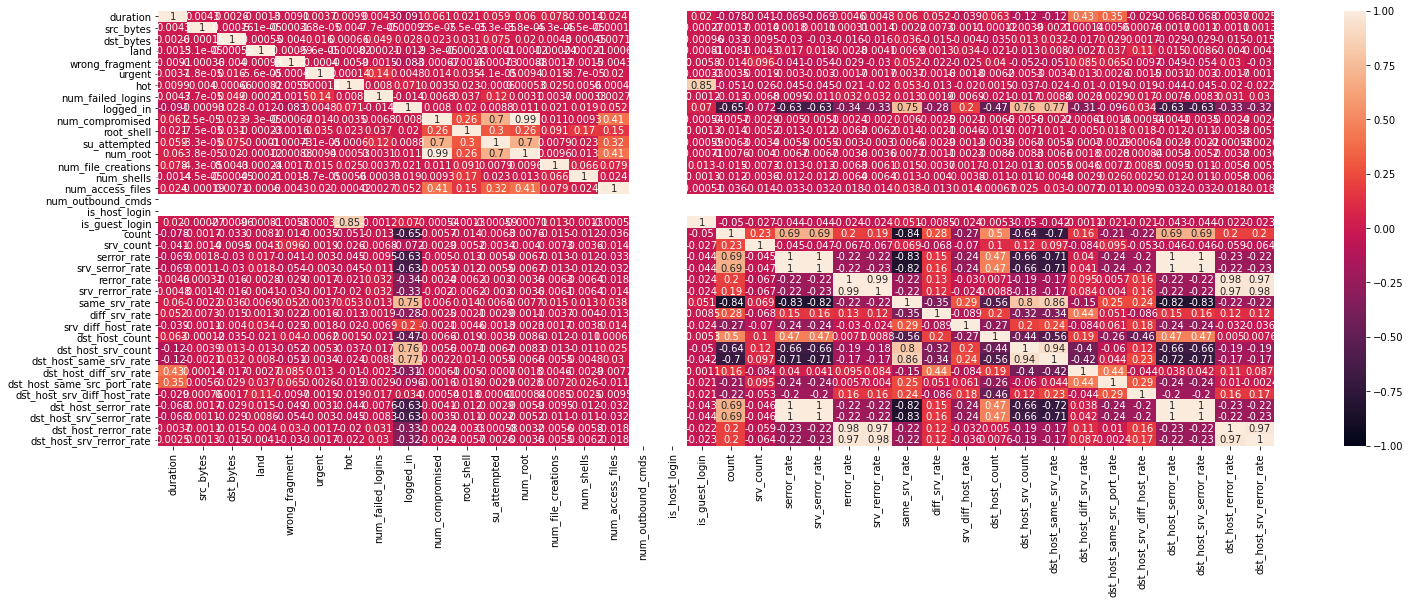

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 8))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
# The correlation heatmap shows that many of the columns are highly correlated

skewness(measure of normal distribution)

In [ ]:
data.skew()
#This shows the degree of skewness of columns in the dataset, the farther from zero it is, the higher the skewness
#some columns are highly skewed.

duration                        15.617807
src_bytes                      379.577754
dst_bytes                       74.338370
land                            85.301818
wrong_fragment                  12.157263
urgent                         243.005916
hot                             18.076161
num_failed_logins               87.285356
logged_in                        0.034061
num_compromised                226.919396
root_shell                      51.420374
su_attempted                   125.381511
num_root                       226.412714
num_file_creations             104.414591
num_shells                      59.085797
num_access_files                33.260643
num_outbound_cmds                0.000000
is_host_login                    0.000000
is_guest_login                  14.475562
count                            1.315556
srv_count                       10.868833
serror_rate                      0.921091
srv_serror_rate                  0.919544
rerror_rate                      2

# **EXPLORATORY DATA ANALYSIS**

In [ ]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


What is the distribution of normal connections to abnormal connections?

In [ ]:
# First classify the data into Normal and abnormal connections
class_outcome=list()
for i in data['class'].values:
  if i == 'normal.':
    class_outcome.append('normal')
  else:
    class_outcome.append('abnormal')

data['class_outcome']= class_outcome



In [ ]:
#calc distribution of normal to abnormal connections
data_class=data.value_counts('class_outcome').reset_index()
data_class=data_class.rename(columns={0:'count'})
#calc percentage of normal to abnormal connections
data_class['perc']=(data_class['count']/data_class['count'].sum()) *100
data_class

,class_outcome,count,perc
0,normal,87831,60.329704
1,abnormal,57754,39.670296


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

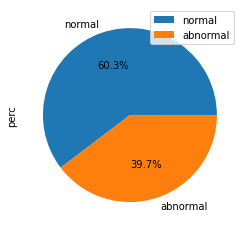

In [ ]:
# Visualization
data_class=data_class.set_index('class_outcome')
data_class.plot(kind='pie', y='perc', autopct='%1.1f%%')
from google.colab import files
plt.savefig("abc.png")
files.download("abc.png") 

What is the distribution of the different types of abnormal connctions

In [ ]:
abnormal_connections=data[data['class_outcome']=='abnormal'] # extract abnornal connection data into new dataframe
abnormal_connections=abnormal_connections['class'].value_counts().reset_index() 

#calc percentage of normal to abnormal connections
abnormal_connections['perc']=(abnormal_connections['class']/abnormal_connections['class'].sum()) *100
abnormal_connections

,index,class,perc
0,neptune.,51820,89.725387
1,back.,968,1.676074
2,teardrop.,918,1.589500
3,satan.,906,1.568723
4,warezclient.,893,1.546213
5,ipsweep.,651,1.127195
6,smurf.,641,1.109880
7,portsweep.,416,0.720296
8,pod.,206,0.356685
9,nmap.,158,0.273574


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

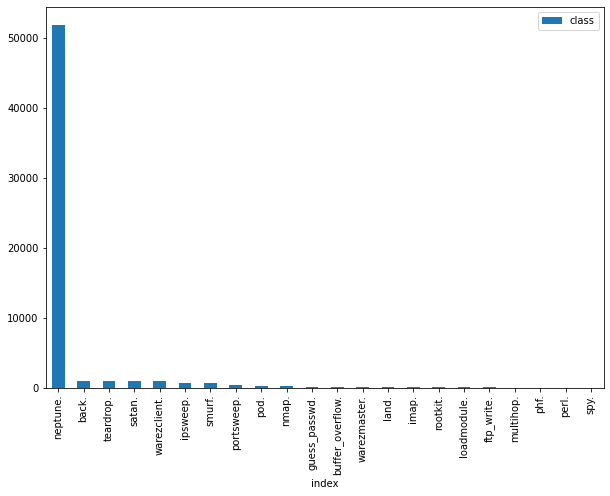

In [ ]:
#Visualization
abnormal_connections.plot(kind='bar', x='index', y='class', figsize=(10,7))
plt.savefig("abc.png")
files.download("abc.png")

In [ ]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,class_outcome
0,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


Distribution of protocol types

In [ ]:
data_protocol=data.value_counts('protocol_type').to_frame().reset_index()
data_protocol=data_protocol.rename(columns={0:'count'})
#calc percentage of respective protocol types
data_protocol['perc']=(data_protocol['count']/data_protocol['count'].sum()) *100
data_protocol

,protocol_type,count,perc
0,tcp,130912,89.921352
1,udp,12267,8.426005
2,icmp,2406,1.652643


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

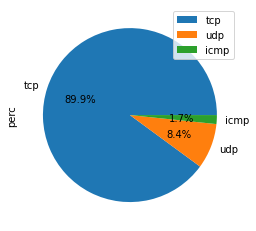

In [ ]:
#Visualization
data_protocol=data_protocol.set_index('protocol_type')
data_protocol.plot(kind='pie', y='perc', autopct='%1.1f%%')
plt.savefig("abc.png")
files.download("abc.png") 

Distribution of protocol types with respect to connection type(normal/abnormal)

In [ ]:
data_protocol_types=data.groupby('class_outcome')['protocol_type'].value_counts().to_frame()
data_protocol_types=data_protocol_types.rename(columns={'protocol_type':'counts'})
data_protocol_types=data_protocol_types.reset_index()
data_protocol_types

,class_outcome,protocol_type,counts
0,abnormal,tcp,55124
1,abnormal,icmp,1514
2,abnormal,udp,1116
3,normal,tcp,75788
4,normal,udp,11151
5,normal,icmp,892


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

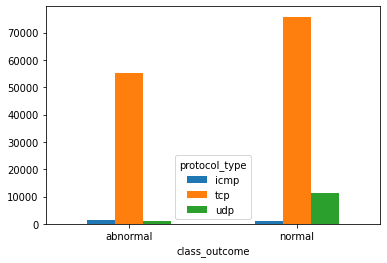

In [ ]:
#visualization
data_protocol_types.pivot("class_outcome", "protocol_type", "counts").plot(kind='bar')
plt.xticks(rotation='horizontal')
plt.savefig("abc.png")
files.download("abc.png") 

Distribution of service

In [ ]:
data['service'].unique()

In [ ]:
data_service=data.value_counts('service').to_frame().reset_index()
data_service=data_service.rename(columns={0:'count'})

#calc percentage of respective protocol types
data_service['perc']=(data_service['count']/data_service['count'].sum()) *100
data_service

,service,count,perc
0,http,62053,42.623210
1,private,49057,33.696466
2,smtp,9721,6.677199
3,domain_u,5425,3.726345
4,other,4769,3.275750
...,...,...,...
61,X11,11,0.007556
62,tim_i,5,0.003434
63,pm_dump,1,0.000687
64,red_i,1,0.000687


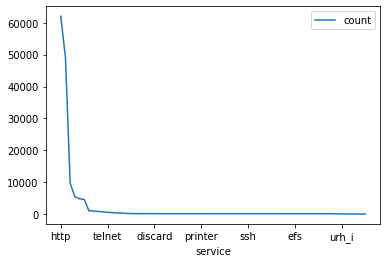

In [ ]:
data_service.plot(kind='line', x='service', y='count')


Analysis based on src_bytes and dst_bytes

In [ ]:
data['src_bytes'].describe()

count    1.455850e+05
mean     7.995753e+03
std      1.820390e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.470000e+02
75%      2.880000e+02
max      6.933756e+08
Name: src_bytes, dtype: float64

In [ ]:
data['dst_bytes'].describe()

count    1.455850e+05
mean     2.859762e+03
std      6.081000e+04
min      0.000000e+00
25%      0.000000e+00
50%      1.050000e+02
75%      1.164000e+03
max      5.155468e+06
Name: dst_bytes, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

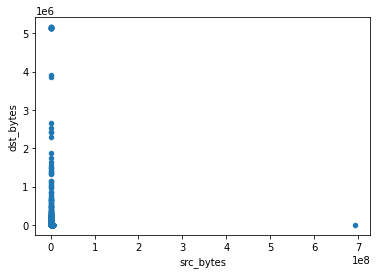

In [ ]:
# Scatter plot to show linear relationship between src_bytes and dst_bytes
data.plot(kind='scatter', x='src_bytes', y='dst_bytes')
plt.savefig("abc.png")
files.download("abc.png")

Analysis Duration

In [ ]:
data['duration'].describe()

count    145585.000000
mean        132.026088
std        1224.161209
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       58329.000000
Name: duration, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

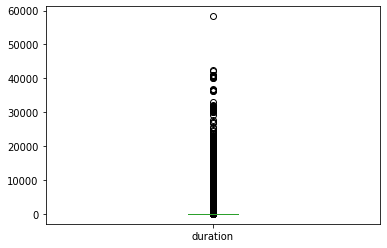

In [ ]:
data['duration'].plot(kind='box')
plt.savefig("abc.png")
files.download("abc.png") 


Distribution by land(1 if connection is from/to the same host/port; 0 otherwise )

In [ ]:
data_land=data['land'].value_counts().to_frame().reset_index()
#calc percentage
data_land['perc']=(data_land['land']/data_land['land'].sum()) * 100
data_land

,index,land,perc
0,0,145565,99.986262
1,1,20,0.013738


In [ ]:
data_land_types=data.groupby('class_outcome')['land'].value_counts().to_frame()
data_land_types=data_land_types.rename(columns={'land':'counts'})
data_land_types=data_land_types.reset_index()
data_land_types

,class_outcome,land,counts
0,abnormal,0,57735
1,abnormal,1,19
2,normal,0,87830
3,normal,1,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

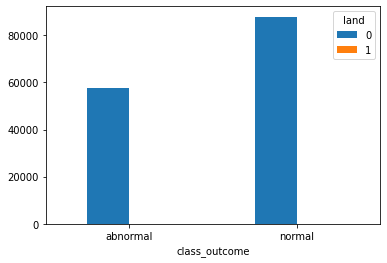

In [ ]:
#visualization
data_land_types.pivot("class_outcome", "land", "counts").plot(kind='bar')
plt.xticks(rotation='horizontal')
plt.savefig("abc.png")
files.download("abc.png")

Distribution by wrong_fragment

In [ ]:
data_wrong_frag=data['wrong_fragment'].value_counts().to_frame().reset_index()
#calc percentage
data_wrong_frag['perc']=(data_wrong_frag['wrong_fragment']/data_wrong_frag['wrong_fragment'].sum()) * 100
data_wrong_frag

,index,wrong_fragment,perc
0,0,144464,99.230003
1,3,910,0.625064
2,1,211,0.144933


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

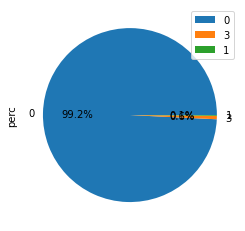

In [ ]:
#VIZ
data_wrong_frag.set_index('index', inplace=True)
data_wrong_frag.plot(kind='pie', y='perc', autopct='%1.1f%%')
plt.savefig("abc.png")
files.download("abc.png")

Distribution of respective wrong frag to types of connections

In [ ]:
data_wrong_frag_types=data.groupby('class_outcome')['wrong_fragment'].value_counts().to_frame()
data_wrong_frag_types=data_wrong_frag_types.rename(columns={'wrong_fragment':'counts'})
data_wrong_frag_types=data_wrong_frag_types.reset_index()
data_wrong_frag_types

,class_outcome,wrong_fragment,counts
0,abnormal,0,56633
1,abnormal,3,910
2,abnormal,1,211
3,normal,0,87831


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

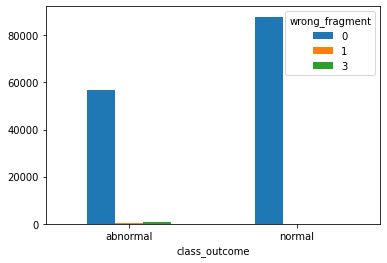

In [ ]:
#visualization
data_wrong_frag_types.pivot("class_outcome", "wrong_fragment", "counts").plot(kind='bar')
plt.xticks(rotation='horizontal')
plt.savefig("abc.png")
files.download("abc.png")

Analysis based on urgent column

In [ ]:
data_urgent=data['urgent'].value_counts().to_frame().reset_index()
#calc percentage
data_urgent['perc']=(data_urgent['urgent']/data_urgent['urgent'].sum()) * 100
data_urgent

,index,urgent,perc
0,0,145581,99.997252
1,1,2,0.001374
2,3,1,0.000687
3,2,1,0.000687


distribution of urgent types to connection types

In [ ]:
data_urgent_types=data.groupby('class_outcome')['urgent'].value_counts().to_frame()
data_urgent_types=data_urgent_types.rename(columns={'urgent':'counts'})
data_urgent_types=data_urgent_types.reset_index()
data_urgent_types

,class_outcome,urgent,counts
0,abnormal,0,57751
1,abnormal,1,2
2,abnormal,2,1
3,normal,0,87830
4,normal,3,1


## **Analysis by Content Features**

In [ ]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,class_outcome
0,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


Analysis of hot indicators

In [ ]:
data_hot=data.groupby('hot')['class_outcome'].value_counts().to_frame()
data_hot=data_hot.rename(columns={'class_outcome':'count'})
data_hot
#The table below shows the grouping of the hot indicators and their respective normal/abnormal counts

count
hot class_outcome       
0   normal         87289
    abnormal       56339
1   abnormal         133
    normal           122
2   abnormal         917
    normal            41
3   abnormal          34
    normal             4
4   normal            97
    abnormal          15
5   normal            35
    abnormal          16
6   normal            96
    abnormal           8
7   normal             4
    abnormal           1
9   normal             1
10  abnormal           1
12  normal             2
14  normal            37
15  abnormal           1
16  normal             1
17  normal             2
18  normal            12
    abnormal           1
19  normal            18
    abnormal           5
20  abnormal           9
    normal             1
22  normal            28
24  normal            13
28  abnormal         274
30  normal            28

Analysis of failed loggins

In [ ]:
# Calc percentage of number of failed loggins
data_failed_logged_in=data.value_counts('num_failed_logins').to_frame().reset_index()
data_failed_logged_in=data_failed_logged_in.rename(columns={0:'count'})
data_failed_logged_in['perc']=(data_failed_logged_in['count']/data_failed_logged_in['count'].sum())*100
data_failed_logged_in

,num_failed_logins,count,perc
0,0,145522,99.956726
1,1,57,0.039152
2,2,3,0.002061
3,5,1,0.000687
4,4,1,0.000687
5,3,1,0.000687


analysis of logged in data to normal/abnormal connections

In [ ]:
data_num_failed_logins=data.groupby('logged_in')['class_outcome'].value_counts().to_frame()
data_num_failed_logins=data_num_failed_logins.rename(columns={'class_outcome':'count'})
data_num_failed_logins


count
logged_in class_outcome       
0         abnormal       55818
          normal         18214
1         normal         69617
          abnormal        1936

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

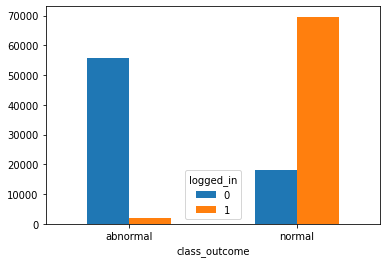

In [ ]:
#Visualization
data_num_failed_logins.reset_index().pivot("class_outcome", "logged_in", "count").plot(kind='bar')
plt.xticks(rotation='horizontal')
plt.savefig("abc.png")
files.download("abc.png")

comparison of root shells to the connection types

In [ ]:
data_root=data.groupby('root_shell')['class_outcome'].value_counts().to_frame()
data_root=data_root.rename(columns={'class_outcome':'count'})
data_root

count
root_shell class_outcome       
0          normal         87808
           abnormal       57722
1          abnormal          32
           normal            23

comparison of su root attempts to the connection types

In [ ]:
data_su_root=data.groupby('su_attempted')['class_outcome'].value_counts().to_frame()
data_su_root=data_su_root.rename(columns={'class_outcome':'count'})
data_su_root

count
su_attempted class_outcome       
0            normal         87820
             abnormal       57753
1            normal             5
             abnormal           1
2            normal             6

Analysis of is host login to normal/abnormal connections(1 if the login belongs to the ``host'' list; 0 otherwise)

In [ ]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,class_outcome
0,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [ ]:
data_hot_login=data.groupby('is_host_login')['class_outcome'].value_counts().to_frame()
data_hot_login=data_hot_login.rename(columns={'class_outcome':'count'})
data_hot_login

count
is_host_login class_outcome       
0             normal         87831
              abnormal       57754

Analysis of guest login to normal/abnormal connections(1 if the login is a ``guest''login; 0 otherwise )

In [ ]:
data_guest=data['is_guest_login'].value_counts().to_frame()
data_guest['perc']=(data_guest['is_guest_login']/data_guest['is_guest_login'].sum()) * 100
data_guest

,is_guest_login,perc
0,144900,99.529484
1,685,0.470516


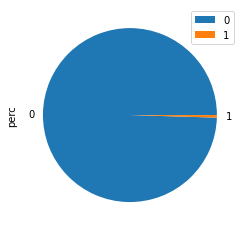

In [ ]:
#visualization
data_guest.plot(kind='pie', y='perc')

plt.savefig("abc.png")
files.download("abc.png")

In [ ]:
data_is_guest_login =data.groupby('is_guest_login')['class_outcome'].value_counts().to_frame()
data_is_guest_login =data_is_guest_login .rename(columns={'class_outcome':'count'})
data_is_guest_login 

count
is_guest_login class_outcome       
0              normal         87460
               abnormal       57440
1              normal           371
               abnormal         314

# **Building of Machine Learning Predictive Model**

In [ ]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate
0,0,0,0,0,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,8,0.0,1.0,0.0,0.0,19,19,0.0,0.05,0.0,0.0
1,0,0,0,0,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,8,0.0,1.0,0.0,0.0,29,29,0.0,0.03,0.0,0.0
2,0,0,0,0,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6,6,0.0,1.0,0.0,0.0,39,39,0.0,0.03,0.0,0.0
3,0,0,0,0,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6,6,0.0,1.0,0.0,0.0,49,49,0.0,0.02,0.0,0.0
4,0,0,0,0,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6,6,0.0,1.0,0.0,0.0,59,59,0.0,0.02,0.0,0.0


In [ ]:
# Handle categorical variables with label encoding
for i in ['protocol_type','service','flag']:
  
  num=data[i].nunique()
  num=range(num)
  uni=data[i].unique()
  for a,b in zip(uni,num):
    data[i].replace(a,b, inplace=True)
    




In [ ]:
# Some columns are highly correlated and one should be dropped;this function does that
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

In [ ]:
#drop one of two columns that have greater than 0.9 correlation
correlation(data, 0.9)
data.shape

(145585, 34)

In [ ]:
#Replace class/target variables: 1 when normal and 0 when abnormal
target=list()
for i in data['class'].values:
  if i == 'normal.':
    target.append(1)
  else:
    target.append(0)

data['class']= target

      
 

Data with Duplicate rows should also be dropped, but this has been done while doing the Exploratory data analysis

In [ ]:
X=data.drop('class', axis=1)
Y=data['class']

In [ ]:
#import necessary library for model train
!pip install lightgbm
!pip install catboost
!pip install xgboost
!pip install rgf_python
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from rgf.sklearn import RGFClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
# THIS FUNCTION TRAIN ON DIFFERENT MODELS, GET THE TEST SCORE OF EACH MODELS AND CREATE A DICTIONARY OF MODELS AND RESPECTIVE SCORES.

def model_train(df_X,df_Y):
    Models=dict()
    x_train, x_test, y_train, y_test= train_test_split(df_X, df_Y, test_size=0.2, random_state=42)
    catboost=CatBoostClassifier()
    lightgbm=LGBMClassifier()
    xgb=XGBClassifier()
    Lr=LogisticRegression()
    Rf=RandomForestClassifier()
    Gb=GradientBoostingClassifier()
    rgf=RGFClassifier()
    mlp=MLPClassifier()
    Model_list=[catboost, lightgbm, xgb, Lr, Rf, Gb, rgf, mlp]
    for model in Model_list:
        len_of_model=len(Model_list)
        current=(Model_list.index(model)) + 1
        print ("Training model " + str(current) +  " of " + str(len_of_model)  )
        model.fit(x_train, y_train)
        
        sc=model.score(x_test,y_test)
        Models[str(current)]=sc
    print (Models)

In [ ]:
model_train(X,Y)

Training model 1 of 8
Learning rate set to 0.078561
0:	learn: 0.4598271	total: 46.2ms	remaining: 46.1s
1:	learn: 0.3308947	total: 91.2ms	remaining: 45.5s
2:	learn: 0.2240635	total: 133ms	remaining: 44.1s
3:	learn: 0.1722436	total: 173ms	remaining: 43s
4:	learn: 0.1357835	total: 213ms	remaining: 42.3s
5:	learn: 0.1125454	total: 255ms	remaining: 42.2s
6:	learn: 0.0859686	total: 298ms	remaining: 42.2s
7:	learn: 0.0733654	total: 340ms	remaining: 42.1s
8:	learn: 0.0559001	total: 382ms	remaining: 42.1s
9:	learn: 0.0438520	total: 423ms	remaining: 41.9s
10:	learn: 0.0352126	total: 466ms	remaining: 41.9s
11:	learn: 0.0301970	total: 508ms	remaining: 41.8s
12:	learn: 0.0279316	total: 549ms	remaining: 41.7s
13:	learn: 0.0257842	total: 589ms	remaining: 41.5s
14:	learn: 0.0241640	total: 632ms	remaining: 41.5s
15:	learn: 0.0220931	total: 672ms	remaining: 41.3s
16:	learn: 0.0209823	total: 721ms	remaining: 41.7s
17:	learn: 0.0190766	total: 767ms	remaining: 41.8s
18:	learn: 0.0183800	total: 805ms	remain

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training model 5 of 8
Training model 6 of 8
Training model 7 of 8
Training model 8 of 8
{'1': 0.9987979530858262, '2': 0.9995191812343305, '3': 0.9983858227152522, '4': 0.9644537555380018, '5': 0.9993131160490435, '6': 0.9982141017275131, '7': 0.9967716454305046, '8': 0.9941614864168699}


In [ ]:
#dictionary of model accuracy
Models_acc={'1': 0.9987979530858262, '2': 0.9995191812343305, '3': 0.9983858227152522, '4': 0.9644537555380018, '5': 0.9993131160490435, '6': 0.9982141017275131, '7': 0.9967716454305046, '8': 0.9941614864168699}

In [ ]:
#convert the dictionary to dataframe

dic={'Model':['catboost', 'lightgbm', 'xgboost', 'Logistic Regression', 'Randomforestclassifier',
                 'Gradienboost', 'randomgreedyforest', 'multilayerperceptron'], 'Model_accuracy':list(Models_acc.values())}
df_model_acc=pd.DataFrame(dic)
df_model_acc


,Model,Model_accuracy
0,catboost,0.998798
1,lightgbm,0.999519
2,xgboost,0.998386
3,Logistic Regression,0.964454
4,Randomforestclassifier,0.999313
5,Gradienboost,0.998214
6,randomgreedyforest,0.996772
7,multilayerperceptron,0.994161
